In [1]:
import pandas as pd
import numpy as np

%matplotlib notebook 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


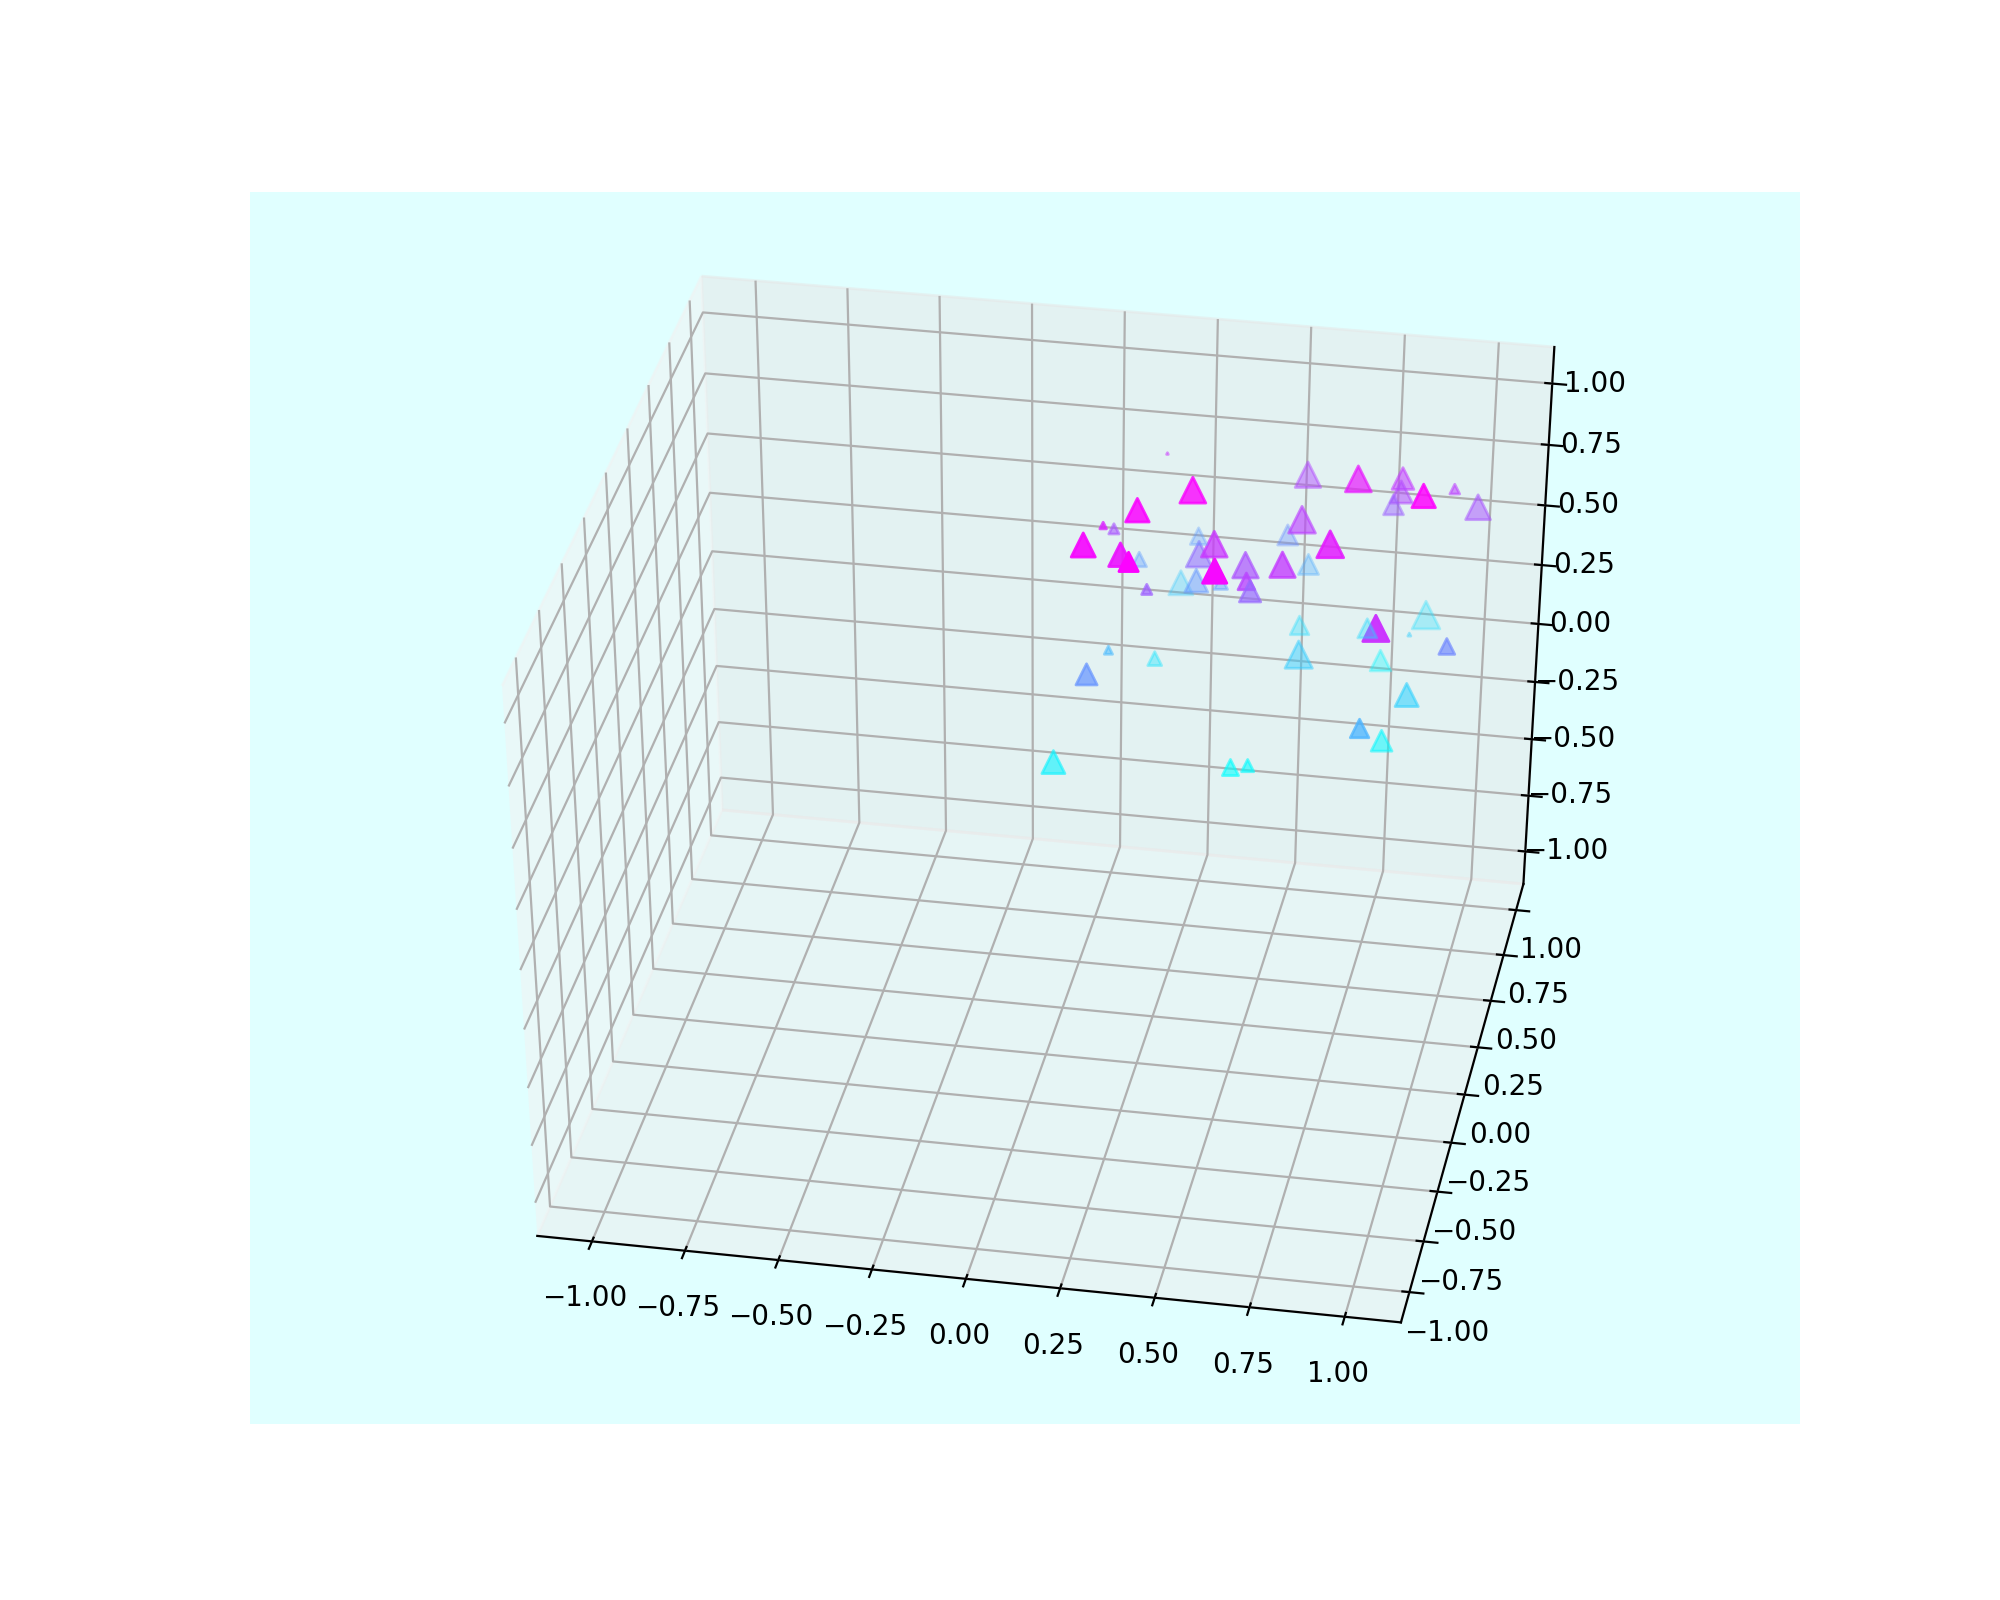

In [3]:
x = np.random.rand(50)
y = np.random.rand(50)
z = np.random.rand(50)

# This generates a fourth variable that is equal to z
# This means it has the same length as z, which is 50.
height = z

density = 100*np.random.rand(50)

fig = plt.figure(figsize=[10, 8]) 
ax = fig.add_subplot(111, facecolor='LightCyan', projection='3d')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
# ax.set_axis_off()

def zoom_factory(ax,base_scale = 2.):
    def zoom_fun(event):
        # get the current x and y limits
        cur_xlim = ax.get_xlim()
        cur_ylim = ax.get_ylim()
        cur_zlim = ax.get_zlim()
        
        x_left = xdata - cur_xlim[0]
        x_right = cur_xlim[1] - xdata
        y_top = ydata - cur_ylim[0]
        y_bottom = cur_ylim[1] - ydata
        z_top = zdata - cur_zlim[0]
        z_bottom = cur_zlim[1] - zdata
        
        xdata = event.xdata # get event x location
        ydata = event.ydata # get event y location
        zdata = event.zdata # get event z location
        
        if event.button == 'up':
            # deal with zoom in
            scale_factor = 1/base_scale
        elif event.button == 'down':
            # deal with zoom out
            scale_factor = base_scale
        else:
            # deal with something that should never happen
            scale_factor = 1
            print (event.button)
        
        # set new limits
        ax.set_xlim([xdata - x_left*scale_factor,
                    xdata + x_right*scale_factor])
        ax.set_ylim([ydata - y_top*scale_factor,
                    ydata + y_bottom*scale_factor])
        ax.set_zlim([zdata - z_left*scale_factor,
                    zdata + z_right*scale_factor])

        plt.draw() # force re-draw

    fig = ax.get_figure() # get the figure of interest
    # attach the call back
    fig.canvas.mpl_connect('scroll_event',zoom_fun)

    #return the function
    return zoom_fun

ax.scatter(x, y, z, c=height, cmap='cool', s=density, marker='^')  
scale = 1.5
f = zoom_factory(ax,base_scale = scale)

